## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [4]:
print(X_train[0].shape)

(28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
X_train = X_train.astype('float32') / 255

In [8]:
X_test = X_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Dropout, MaxPool2D, Reshape
from tensorflow.keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
import tensorflow as tf
tf.keras.backend.clear_session
model = Sequential()

model.add(BatchNormalization(input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
early_stopping = EarlyStopping(patience = 5, monitor = 'val_acc')

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,286
Trainable params: 2,370,284
Non-trainable params: 2
______________________________________________

In [13]:
model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_test, y_test), callbacks = early_stopping)

Epoch 1/10
938/938 [==============================] - 10s 4ms/step - loss: 0.4817 - acc: 0.8262 - val_loss: 0.2946 - val_acc: 0.8939
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2193 - acc: 0.9186 - val_loss: 0.2497 - val_acc: 0.9067
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1540 - acc: 0.9436 - val_loss: 0.2501 - val_acc: 0.9111
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0977 - acc: 0.9642 - val_loss: 0.2882 - val_acc: 0.9086
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0621 - acc: 0.9773 - val_loss: 0.3339 - val_acc: 0.9099
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0382 - acc: 0.9866 - val_loss: 0.4121 - val_acc: 0.9082
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0275 - acc: 0.9904 - val_loss: 0.4720 - val_acc: 0.9079
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [14]:
tf.keras.backend.clear_session
model = Sequential()

model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

early_stopping = EarlyStopping(patience = 5, monitor = 'val_acc')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_test, y_test), callbacks = early_stopping)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5271 - acc: 0.8097 - val_loss: 0.2848 - val_acc: 0.8990
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2596 - acc: 0.9047 - val_loss: 0.2445 - val_acc: 0.9094
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2003 - acc: 0.9260 - val_loss: 0.2410 - val_acc: 0.9105
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1669 - acc: 0.9383 - val_loss: 0.2287 - val_acc: 0.9176
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1425 - acc: 0.9479 - val_loss: 0.2226 - val_acc: 0.9232
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1167 - acc: 0.9561 - val_loss: 0.2477 - val_acc: 0.9179
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0983 - acc: 0.9638 - val_loss: 0.2443 - val_acc: 0.9215
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 20,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip = True)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

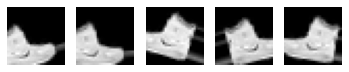

In [16]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [17]:
tf.keras.backend.clear_session
model = Sequential()

model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

early_stopping = EarlyStopping(patience = 5, monitor = 'val_acc')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [18]:
 model.fit_generator(
    datagen.flow(X_train, y_train, batch_size = 32),
    steps_per_epoch = len(X_train) // 32,
    epochs = 10,
    validation_data = (X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 18s 10ms/step - loss: 0.9997 - acc: 0.6259 - val_loss: 0.5236 - val_acc: 0.8069
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5946 - acc: 0.7776 - val_loss: 0.4739 - val_acc: 0.8277
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5294 - acc: 0.8029 - val_loss: 0.4621 - val_acc: 0.8304
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4893 - acc: 0.8165 - val_loss: 0.4006 - val_acc: 0.8566
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4698 - acc: 0.8235 - val_loss: 0.4057 - val_acc: 0.8524
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4467 - acc: 0.8348 - val_loss: 0.3947 - val_acc: 0.8552
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4377 - acc: 0.8380 - val_loss: 0.3736 - val_acc: 0.8649
Epoch 8/10
1875/1875 [==============================] - 18s 9m

###  Report the final train and validation accuracy

In [19]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3306 - acc: 0.8796


[0.33058691024780273, 0.8795833587646484]

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3567 - acc: 0.8758


[0.35673901438713074, 0.8758000135421753]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [21]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [23]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [24]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [25]:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [26]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

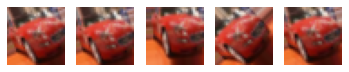

In [27]:
from matplotlib import pyplot as plt
gen = data_gen.flow(X_train[5:6], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()